In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [104]:
df = pd.read_csv('./Pokemon.csv')
df2 =  df.sort_values("Type 1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [56]:
number_of_Water = 50
number_of_normal = 50

total_train = number_of_Water + number_of_normal
mask_water = df['Type 1'] =='Water'
mask_normal= df['Type 1'] =='Normal'

total = df[mask_water | mask_normal]


In [57]:
matrix_mean = [total['HP'].mean(),
               total['Attack'].mean(),
               total['Defense'].mean(),
               total['Sp. Atk'].mean(),
               total['Sp. Def'].mean(),
               total['Speed'].mean()]

In [97]:
HP_matrix =      np.array(total['HP'])
Attack_matrix =  np.array(total['Attack'])
Defense_matrix = np.array(total['Defense'])
SpAtk_matrix =   np.array(total['Sp. Atk'])
SpDef_matrix =   np.array(total['Sp. Def'])
Speed_matrix =   np.array(total['Speed'])

sum = np.zeros([6,6])



total_data = np.vstack((HP_matrix,
                        Attack_matrix,
                        Defense_matrix,
                        SpAtk_matrix,
                        SpDef_matrix,
                        Speed_matrix)).T


In [98]:
w,h = np.linalg.eig(np.cov(total_data.T))

In [99]:
w

array([2281.24051217,  961.75273197,  563.09229294,  478.58489653,
        203.00639172,  301.16673812])

In [100]:
h

array([[-0.39537644, -0.74652147, -0.33046285, -0.31370776, -0.27680707,
         0.04629006],
       [-0.45571409,  0.38245439, -0.15008681, -0.59702372,  0.49823057,
         0.13731801],
       [-0.40340947,  0.27623874,  0.50678577, -0.21155115, -0.58986861,
        -0.33379975],
       [-0.47915373,  0.04010765,  0.1949865 ,  0.4597324 , -0.05742882,
         0.71842285],
       [-0.44034356, -0.22876458,  0.15148774,  0.4287557 ,  0.4859149 ,
        -0.5575581 ],
       [-0.22309683,  0.4076575 , -0.74193542,  0.3243623 , -0.29629007,
        -0.20143558]])

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

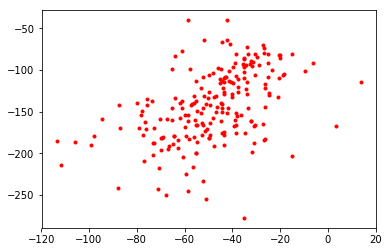

In [109]:
w1 = h[5]
w2 = h[0]
w1 =  np.array(w1).reshape(6,1).T
w2 =  np.array(w2).reshape(6,1).T
w1_plot = []
w2_plot = []

for y in total_data:

    w1_plot.append(np.dot(w1,y))
    w2_plot.append(np.dot(w2,y))
plt.plot(w1_plot,w2_plot,'r.')

In [67]:
import matplotlib.pyplot as plt

from sklearn import decomposition
from numpy.random import RandomState
from keras.datasets import mnist
from keras.utils import np_utils
n_components = 6

In [68]:
estimators = [
    ('Eigenfaces - PCA using randomized SVD',
         decomposition.PCA(n_components=6,whiten=True)),

    ('Non-negative components - NMF',
         decomposition.NMF(n_components=6, init='nndsvda', tol=5e-3))
]

In [82]:
for name, estimator in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    print(total_data.shape)
    estimator.fit(total_data)
    components_ = estimator.components_
    print(components_)

Extracting the top 6 Eigenfaces - PCA using randomized SVD...
(210, 6)
[[ 0.39537644  0.45571409  0.40340947  0.47915373  0.44034356  0.22309683]
 [ 0.74652147 -0.38245439 -0.27623874 -0.04010765  0.22876458 -0.4076575 ]
 [-0.33046285 -0.15008681  0.50678577  0.1949865   0.15148774 -0.74193542]
 [-0.31370776 -0.59702372 -0.21155115  0.4597324   0.4287557   0.3243623 ]
 [ 0.04629006  0.13731801 -0.33379975  0.71842285 -0.5575581  -0.20143558]
 [ 0.27680707 -0.49823057  0.58986861  0.05742882 -0.4859149   0.29629007]]
Extracting the top 6 Non-negative components - NMF...
(210, 6)
[[ 13.31024637  51.81209478  16.4983078    0.          63.21738593
    0.        ]
 [  0.         203.08486838 104.69055665  63.06375047   0.
  226.26858916]
 [132.88927672 289.48350649 147.09853848  20.23670453   0.
    0.        ]
 [ 52.95073537  37.95690659  46.66532515  90.02407348  25.91632049
   32.57531819]
 [ 37.74172169  63.07868152  42.42712273  37.57256965  73.97775992
   53.62652131]
 [ 73.77986289  

In [78]:
components_

array([[ 13.31024637,  51.81209478,  16.4983078 ,   0.        ,
         63.21738593,   0.        ],
       [  0.        , 203.08486838, 104.69055665,  63.06375047,
          0.        , 226.26858916],
       [132.88927672, 289.48350649, 147.09853848,  20.23670453,
          0.        ,   0.        ],
       [ 52.95073537,  37.95690659,  46.66532515,  90.02407348,
         25.91632049,  32.57531819],
       [ 37.74172169,  63.07868152,  42.42712273,  37.57256965,
         73.97775992,  53.62652131],
       [ 73.77986289,  56.97479434,  60.92798268,  65.94428678,
         56.71207854,  61.58303   ]])

In [119]:
w,h = np.linalg.eig(np.cov(total_data.T))

In [122]:
h

array([[-0.39537644, -0.74652147, -0.33046285, -0.31370776, -0.27680707,
         0.04629006],
       [-0.45571409,  0.38245439, -0.15008681, -0.59702372,  0.49823057,
         0.13731801],
       [-0.40340947,  0.27623874,  0.50678577, -0.21155115, -0.58986861,
        -0.33379975],
       [-0.47915373,  0.04010765,  0.1949865 ,  0.4597324 , -0.05742882,
         0.71842285],
       [-0.44034356, -0.22876458,  0.15148774,  0.4287557 ,  0.4859149 ,
        -0.5575581 ],
       [-0.22309683,  0.4076575 , -0.74193542,  0.3243623 , -0.29629007,
        -0.20143558]])

In [123]:
h1 =h[0].reshape(6,1).astype('float32')

In [127]:
d = (x-matrix_mean).reshape(6,1).astype('float32')

In [124]:
h1

array([[-0.39537644],
       [-0.7465215 ],
       [-0.33046284],
       [-0.31370777],
       [-0.27680707],
       [ 0.04629006]], dtype=float32)

In [125]:
i = 0
for x in total_data :
    print(np.dot(x-matrix_mean,h[1]))

8.633999893795853
6.359905822609683
5.154625819735475
-15.066902816091018
9.35346671294604
2.935429385800421
0.6121766328396157
-31.216133273804598
27.035365300788513
27.39712993678282
18.908775449766765
14.892262539613768
-37.71934476203997
-51.295241622970636
14.27874737282027
9.658206303249065
-4.301758919024554
-9.846408202510002
15.440585280271824
5.044447261979592
5.865010793195316
33.54371224408548
18.4596163982809
-15.659324161451506
-34.6996873493673
-63.11647570270726
9.552635269046435
28.78882098136848
24.168279911797274
5.666647068202796
1.0461059986315915
-0.5951443049680307
-20.039536181948613
29.51755399626343
24.897012926692227
-13.4273704614878
-62.339396716195765
16.95536775574371
24.82458043588964
-17.833132567388223
-24.944826489742184
20.921841329609382
11.50556967373262
4.710308933677705
-0.8343403498077429
28.05181462319419
10.593190600450605
29.924502128706862
45.872209495873065
-21.774177434950754
3.2715676995364187
13.680793154905995
-40.66053199900799
-12.924

In [112]:
a

-24.69972519161327